<h2>Dataset Testing Notebook</h2>
This notebook provides utility programs to evaluate a dataset for quality

In [1]:
# import necessary libraries
%pip install -q -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble, datasets, metrics, model_selection, preprocessing, pipeline

Note: you may need to restart the kernel to use updated packages.


<h3>View all examples in dataset</h3>
The code below loads in our dataset from a CSV vile and prints it out so we can inspect it

In [2]:
# Load database from csv file
try:
    df = pd.read_csv('wine_raw.csv')
 
    X = df.drop('target', axis =1 )
    y = df['target']
except:
    raise Exception("Could not load wine dataset")

<h2>Check for duplicates in the dataset</h2>
Duplicate data samples skew our training results and should be removed

In [3]:
# Check to make sure there are no duplicates in the dataset
print(X.duplicated())

0      False
1       True
2      False
3      False
4      False
       ...  
174    False
175    False
176    False
177    False
178    False
Length: 179, dtype: bool


<h2>Check for missing attributes in data samples</h2>
Missing data attributes will skew our results. If there are missing data attributes, either remove the data samples that have this issue or use a mean value to add in appropriate information

In [4]:
# Check to make sure there is no missing data in the dataset
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    179 non-null    float64
 2   ash                           179 non-null    float64
 3   alcalinity_of_ash             179 non-null    float64
 4   magnesium                     179 non-null    int64  
 5   total_phenols                 179 non-null    float64
 6   flavanoids                    179 non-null    float64
 7   nonflavanoid_phenols          179 non-null    float64
 8   proanthocyanins               179 non-null    float64
 9   color_intensity               179 non-null    float64
 10  hue                           179 non-null    float64
 11  od280/od315_of_diluted_wines  179 non-null    float64
 12  proline                       179 non-null    int64  
 13  count

<h2>Check that all data types are correct</h2>
Incorrect datatypes can cause errors during input of training and testing data and should be corrected

In [5]:
# Check all data types
cat_col = [col for col in X.columns if X[col].dtype == 'object'] 
num_col = [col for col in X.columns if X[col].dtype != 'object']
print('type is an object:', cat_col)
print('type is numerical:', num_col)

type is an object: ['country_code']
type is numerical: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<h2>Check for unique values</h2>
Unique values provide coverage across your domain of inputs and are encouraged. Seek out any attributes with only a single value as they are not helpful during training and testing.

In [6]:
# Check how many unique values there are per category
print(X[cat_col].nunique())
print(X[num_col].nunique())

country_code    1
dtype: int64
alcohol                         125
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64


<h2>Check for category bias</h2>
Review the counts for classification categories to make sure there is enough data per category to train fairly

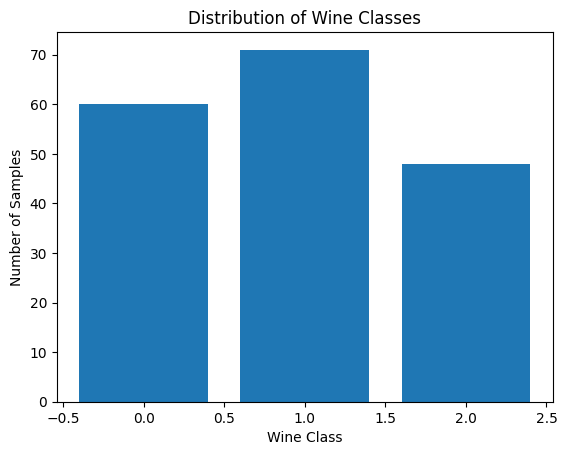

In [7]:
# Get the unique wine classes and their counts
wine_classes, wine_counts = np.unique(y, return_counts=True)

# Create the bar plot
plt.bar(wine_classes, wine_counts)

# Set labels and title
plt.xlabel("Wine Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of Wine Classes")

# Show the plot
plt.show()

<h2>Plot data attribute relationships</h2>
By plotting data relationships you can see how attributes cluster and separate from each other. Clustering within a classification category helps a model learn and become more accurate over time.

C:\Users\Administrator\training-env\Lib\site-packages\matplotlib\colors.py:1352: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Administrator\training-env\Lib\site-packages\matplotlib\colors.py:1359: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\Administrator\training-env\Lib\site-packages\matplotlib\ticker.py:547: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


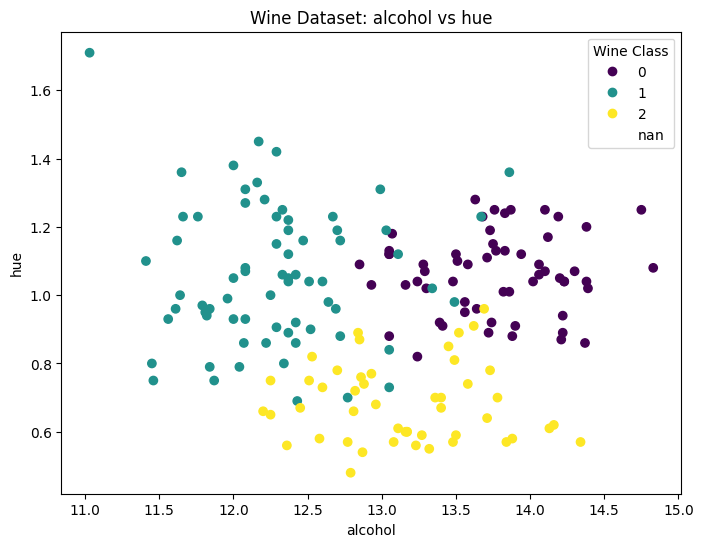

In [8]:
# Select wine characteristics to plot
x_axis = 'alcohol'
y_axis = 'hue'

# Create the scatterplot, color-coded by target
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[x_axis], X[y_axis], c=y)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Wine Dataset: {} vs {}'.format(x_axis, y_axis))

# Create a legend
plt.legend(*scatter.legend_elements(), title="Wine Class")

plt.show()  

<h2>Generate statistics on data attributes</h2>
By looking at means, standard deviations, min values, max values, etc. you can get a feel for the data attributes and identify those that might not be appropriate for training

In [9]:
# Calculate the mean and standard deviation of features
mean = X['alcohol'].mean()
std = X['alcohol'].std()
print('alcohol mean: ', mean)
print('alcohol std: ', std)
print('lower_bound: ', mean - std*2)
print('upper_bound: ', mean + std*2)

alcohol mean:  13.006404494382025
alcohol std:  0.8169106019051965
lower_bound:  11.372583290571631
upper_bound:  14.640225698192419


<h2>Class exercise</h2>
Plot different data attributes to detect attributes that are not unique and adding value. Use the unique values calculations to zero in on those you want to plot that appear to not have as much variations as other attributes. If the plot results show lots of diffusion or straight lines there is an issue.

Also look for those data attributes (and relationships between attributes) that appear to clearly distinguish different wine categories from each other. If there are tight clusters of points of the same color (category), you have two attributes that are distinguishable from each other.